STEP 1: Load the dataset


In [26]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

#loading the dataset
file_path="/content/drive/My Drive/dataset/survey lung cancer.csv"
df=pd.read_csv(file_path)
#Display the first 5 rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [27]:

# Display basic dataset info
print(df.info())
print(df.head())
print(df.describe())

# Check for missing values and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

STEP 2: Exploratory Data Analysis and Visualization

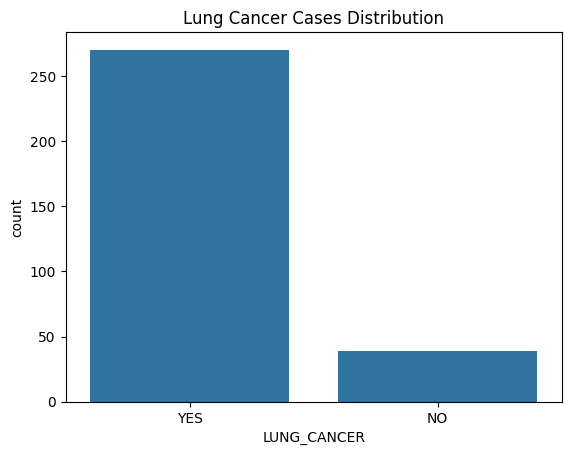

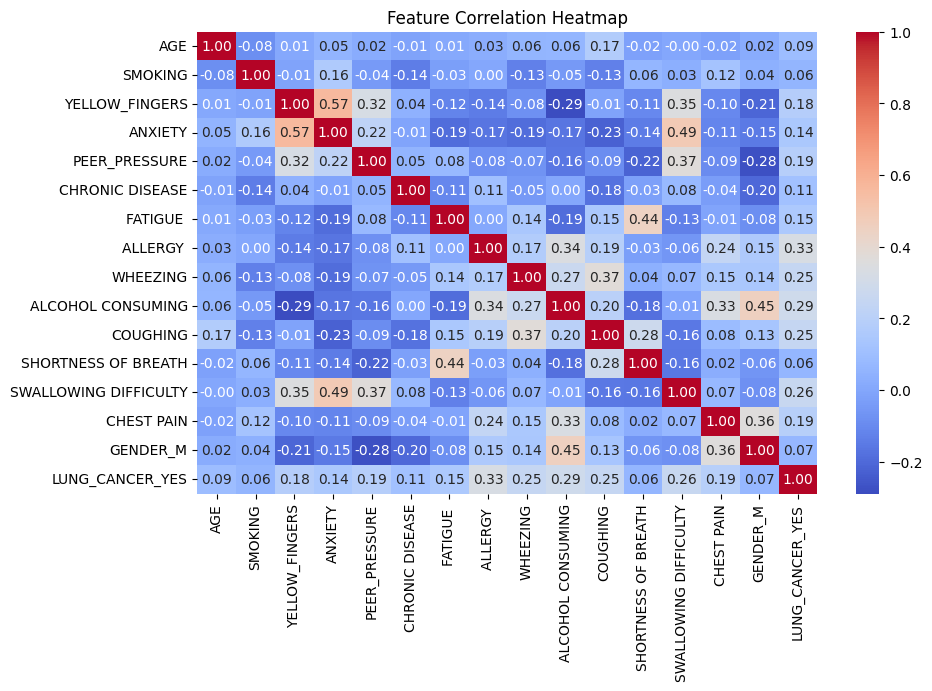

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#Check the distribution of the target variable

sns.countplot(x="LUNG_CANCER", data=df)
plt.title("Lung Cancer Cases Distribution")
plt.show()

#Check correlations between features

import numpy as np
df_encoded=df.copy()
df_encoded=pd.get_dummies(df_encoded, drop_first=True)
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


STEP 3: Preprocessing and Splitting Data

In [29]:
from sklearn.model_selection import train_test_split

# Convert categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(columns=["LUNG_CANCER_YES"])
y = df["LUNG_CANCER_YES"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



STEP 4: Build Logistic Regression from Scratch

In [ ]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.array(z, dtype=np.float64)  # Convert z to NumPy array
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)  # Convert X to NumPy array
        y = np.array(y, dtype=np.float64)  # Convert y to NumPy array

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X = np.array(X, dtype=np.float64)  # Ensure X is NumPy array
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Train model
log_model = LogisticRegressionScratch()
log_model.fit(X_train.to_numpy(), y_train.to_numpy())

# Predictions
y_pred_test = log_model.predict(X_test.to_numpy())

# Evaluate Model
from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))


Test Accuracy: 0.967741935483871
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
log_reg = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train models
log_reg.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg.predict(X_test)))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_model.predict(X_test)))


Logistic Regression Accuracy: 0.9838709677419355
Random Forest Accuracy: 0.967741935483871


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, 15]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 5, 'n_estimators': 50}


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY'],
      dtype='object')


In [ ]:
# Keep only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train final model
final_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
final_rf_model.fit(X_train_selected, y_train)

# Evaluate final model
final_predictions = final_rf_model.predict(X_test_selected)
print("Final Model Accuracy:", accuracy_score(y_test, final_predictions))

Final Model Accuracy: 0.9354838709677419


Regression task
Step 1: Load and analyse dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

#loading the dataset
file_path="/content/drive/My Drive/dataset/survey lung cancer.csv"
df=pd.read_csv(file_path)
#Display the first 5 rows
df.head()
# Display the first few rows
print(df.head())

# Show data types and missing values
print(df.info())

# Describe the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Convert categorical variables to numerical
encoder = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = encoder.fit_transform(df[col])

# Display updated dataset
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1  

Step 2 :Data visualisation

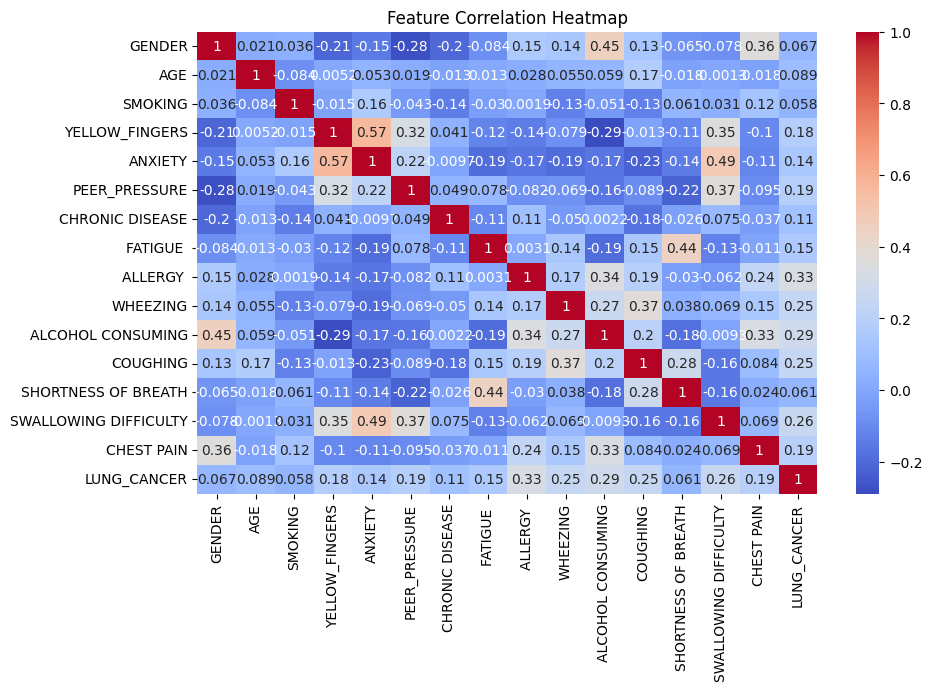

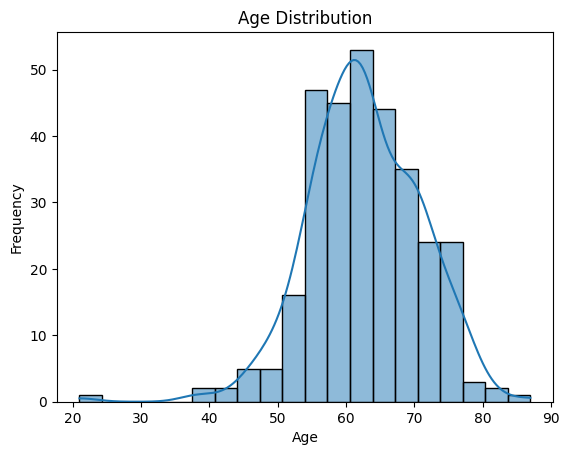

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of Age
sns.histplot(df["AGE"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


STEP 3: Prepare Data for regression

In [ ]:
# Define independent variables (X) and dependent variable (y)
X = df.drop(columns=["AGE"])  # Predicting Age
y = df["AGE"]

# Split the dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (247, 15)
Test set size: (62, 15)


Step 4: Implement Linear Regression from Scratch


In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y)

        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            error = y_predicted - y

            # Update weights and bias
            self.weights -= self.learning_rate * (1/n_samples) * np.dot(X.T, error)
            self.bias -= self.learning_rate * (1/n_samples) * np.sum(error)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train the model
lr_scratch = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
lr_scratch.fit(X_train, y_train)

# Make predictions
y_pred_scratch = lr_scratch.predict(X_test)

# Evaluate the model
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print(f"Linear Regression (Scratch) - MSE: {mse_scratch:.2f}, R²: {r2_scratch:.2f}")


Linear Regression (Scratch) - MSE: 89.62, R²: -0.24


Step 5: Train Regression Models Using Scikit-Learn



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Random Forest Regressor - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


Linear Regression - MSE: 78.99, R²: -0.09
Random Forest Regressor - MSE: 84.09, R²: -0.16


Step 6: Hyperparameter Optimization




In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train model with best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest - MSE: {mse_best_rf:.2f}, R²: {r2_best_rf:.2f}")


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Tuned Random Forest - MSE: 84.46, R²: -0.17


Step 7: Feature Selection


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 5 best features
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}")

# Train models with selected features
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train linear regression with selected features
lr_fs = LinearRegression()
lr_fs.fit(X_train_fs, y_train_fs)
y_pred_lr_fs = lr_fs.predict(X_test_fs)

# Evaluate
mse_lr_fs = mean_squared_error(y_test_fs, y_pred_lr_fs)
r2_lr_fs = r2_score(y_test_fs, y_pred_lr_fs)

print(f"Feature Selected Linear Regression - MSE: {mse_lr_fs:.2f}, R²: {r2_lr_fs:.2f}")


Selected Features: ['SMOKING', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'LUNG_CANCER']
Feature Selected Linear Regression - MSE: 75.80, R²: -0.05
